In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cm=pd.read_excel('Consumer_Complaints.xlsx')
cm

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Company has responded to the consumer and the ...,Closed with explanation,Yes
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,Company has responded to the consumer and the ...,Closed with explanation,Yes
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [3]:
pd.DataFrame({'count':cm.shape[0],
               'null':cm.isnull().sum(),
               'nulls%':cm.isnull().mean()*100,
               'cardinality':cm.nunique(),      
})

,count,null,nulls%,cardinality
Complaint ID,62516,0,0.000000,62516
Submitted via,62516,0,0.000000,7
Date submitted,62516,0,0.000000,2308
Date received,62516,0,0.000000,2305
State,62516,0,0.000000,51
Product,62516,0,0.000000,9
Sub-product,62516,7,0.011197,46
Issue,62516,0,0.000000,76
Sub-issue,62516,10858,17.368354,158
Company public response,62516,2175,3.479109,6


In [4]:
cm.duplicated().any()

False

In [5]:
cm.drop(columns=['Complaint ID'], inplace=True)

In [8]:
cm.fillna(0, inplace=True)
cm.to_csv('cutomer_complaints(clean).csv')

In [9]:
cmc=pd.read_csv('cutomer_complaints(clean).csv')

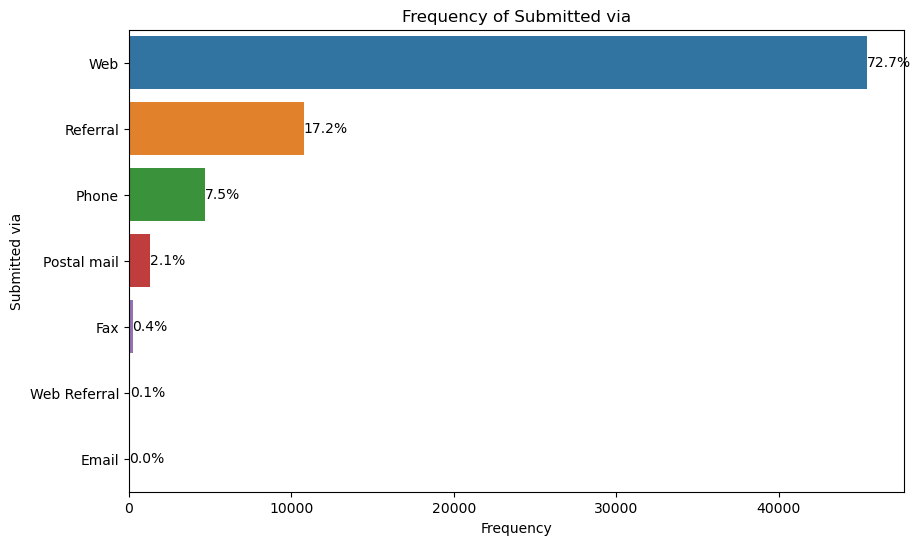

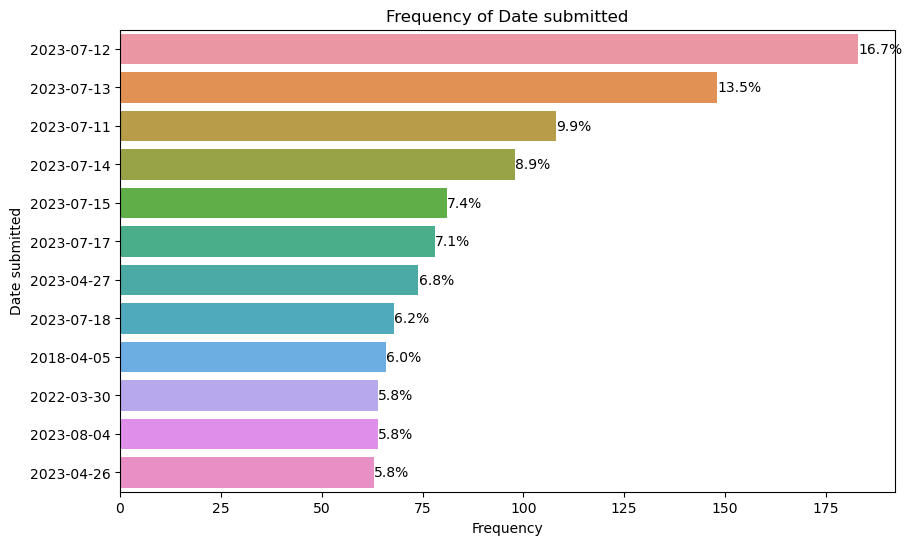

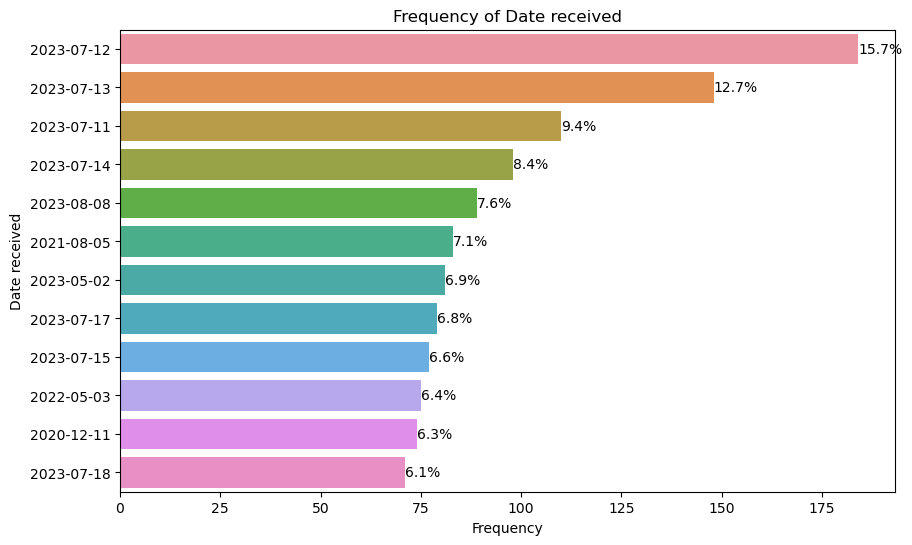

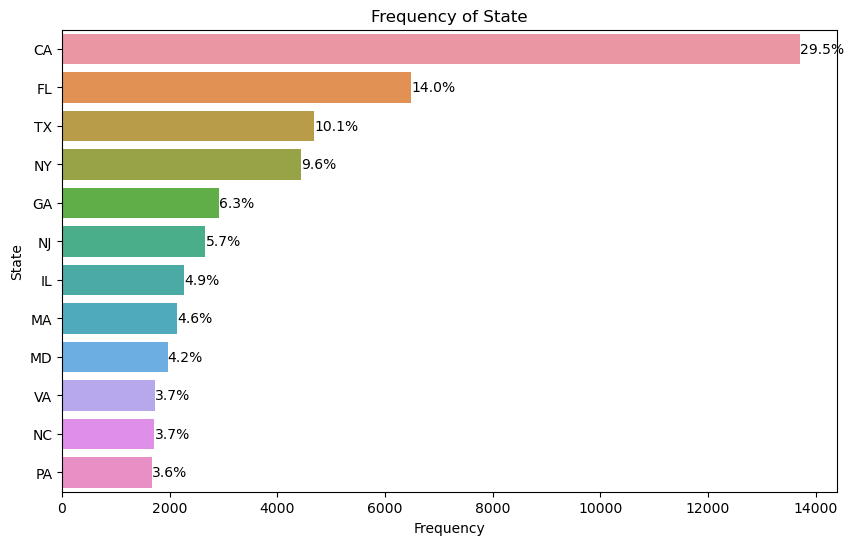

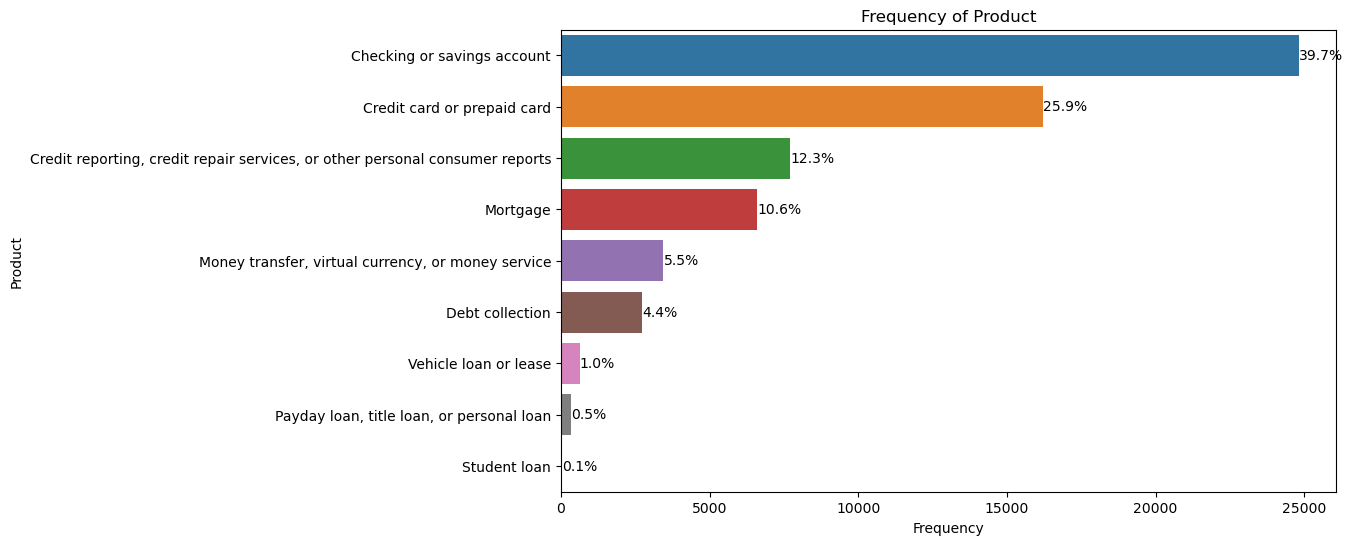

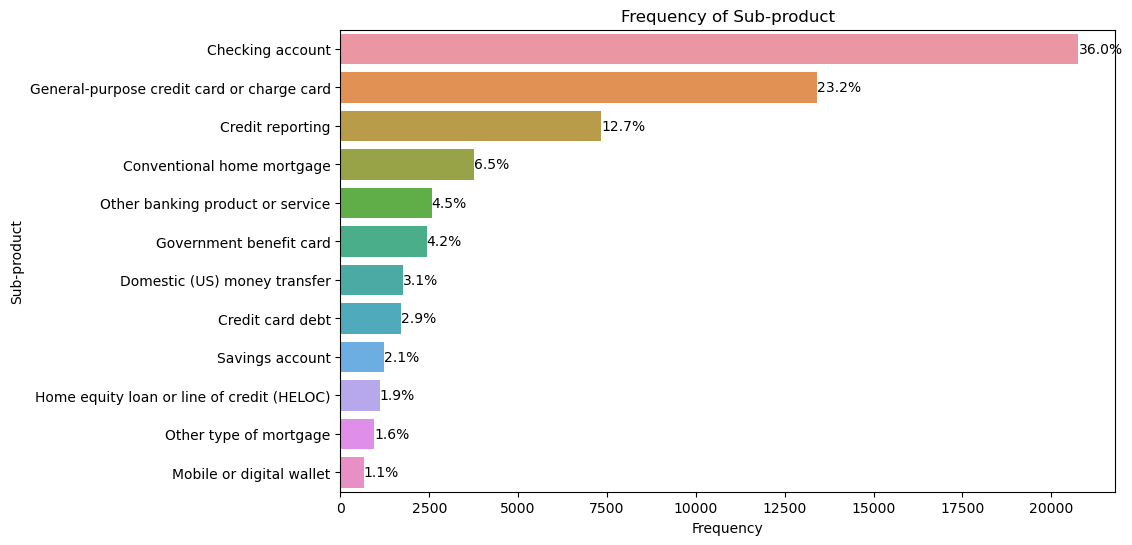

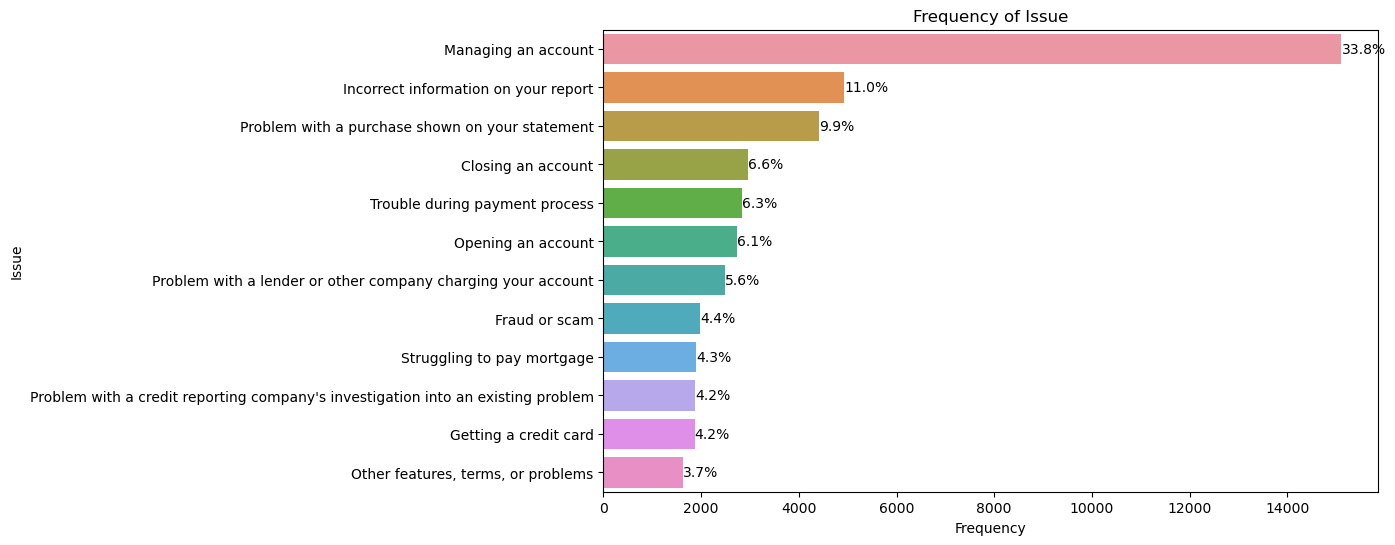

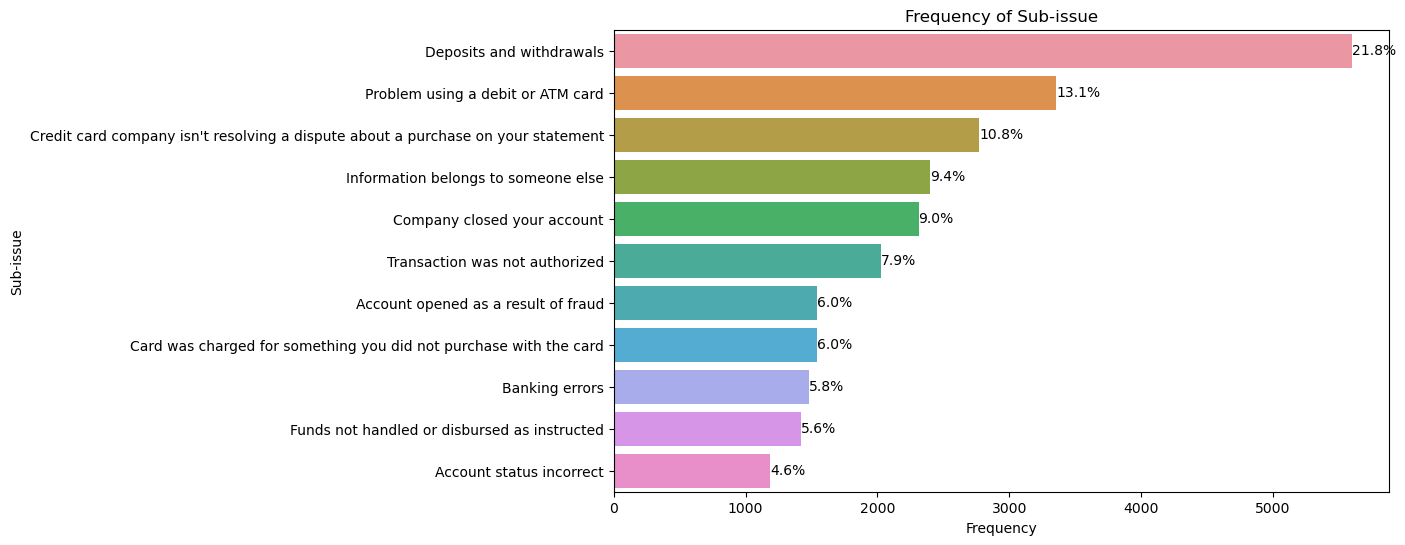

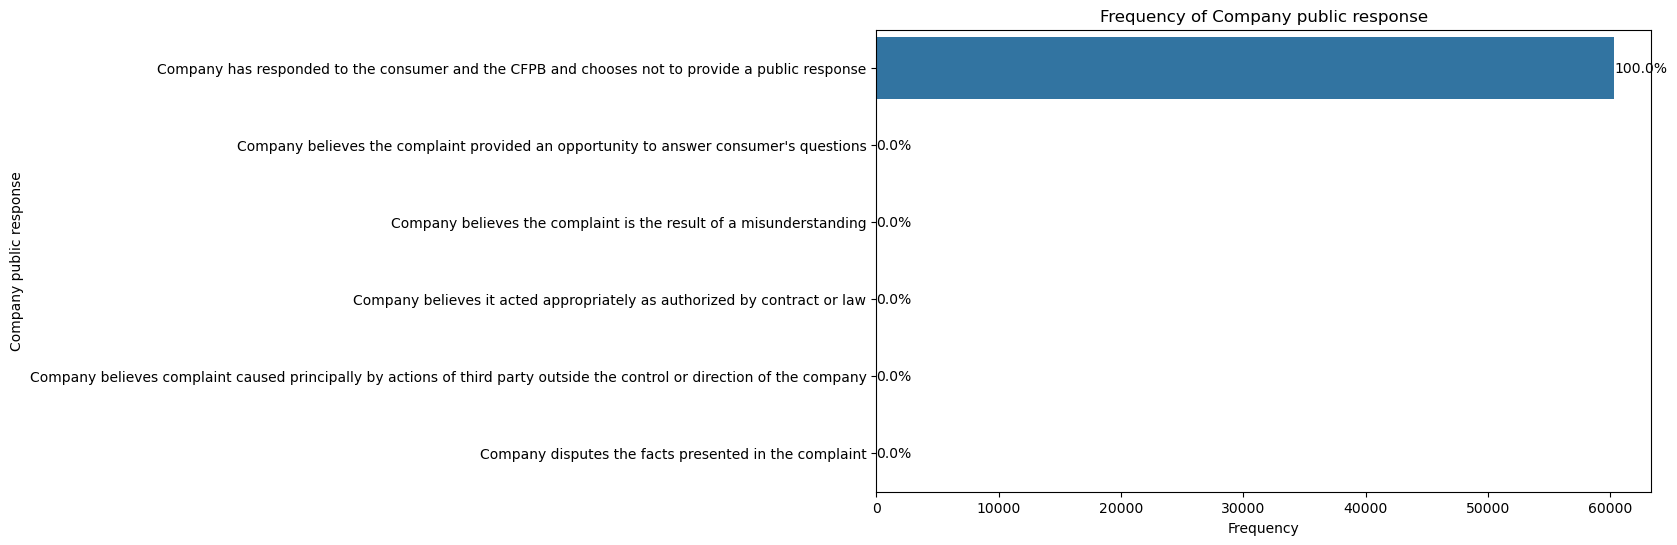

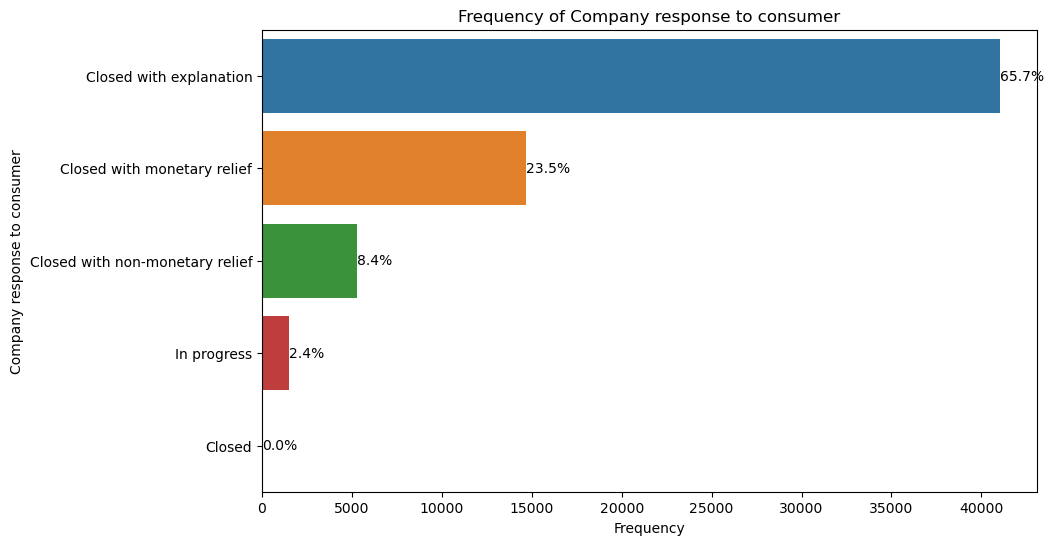

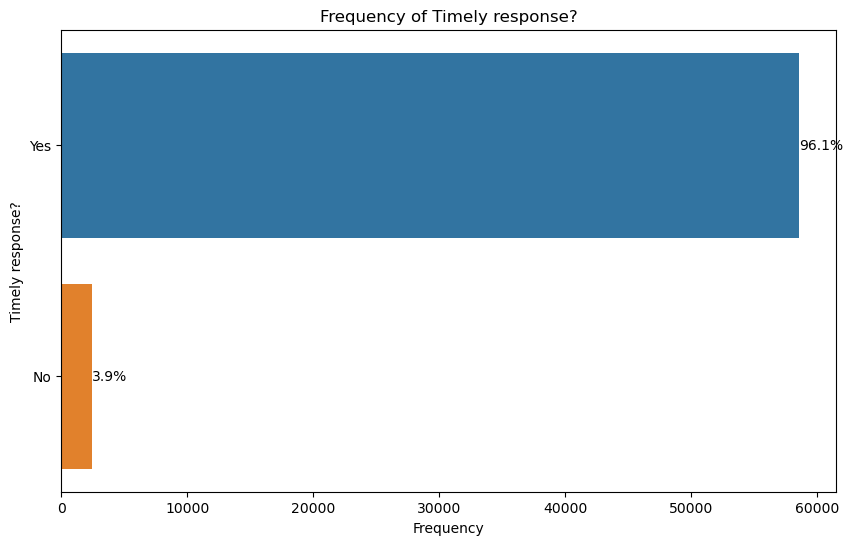

In [12]:
categorical_columns = cmc.select_dtypes(include=['object']).columns

for col in categorical_columns:
    top_values = cmc[col].value_counts().nlargest(12).index.tolist()
    if "0" in top_values:
        top_values.remove("0")
    filtered_data = cmc[(cmc[col].isin(top_values)) & (cmc[col] != "0")]

    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=filtered_data[col], order=top_values)

    plt.title(f'Frequency of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)

    total = len(filtered_data[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='left', va='center')

    plt.show()


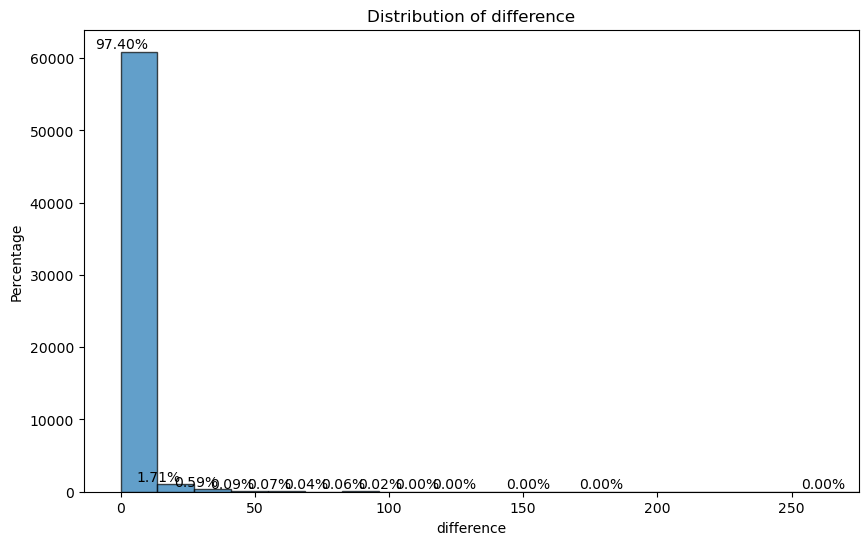

In [14]:
cm['difference'] = (cm['Date received'] - cm['Date submitted']).dt.days
numerical_columns = cm.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(cm[col], bins=20, edgecolor='black', alpha=0.7)
    total_count = sum(counts)  
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    
    for count, bin_edge in zip(counts, bins[:-1]):
        percentage = (count / total_count) * 100 
        if count != 0.0: 
            plt.text(bin_edge + 0.5, count + 1, f'{percentage:.2f}%', ha='center', va='bottom')
            
    plt.xlim(right=bins[-1]) 
    
    plt.show()